In [9]:
import mysql.connector
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
# Koneksi ke database MySQL
db_config = mysql.connector.connect(
    host="localhost",
    user="alie",
    password="kmzway76aa",
    database="product_review_sentiment_analysis_tokopedia"
)

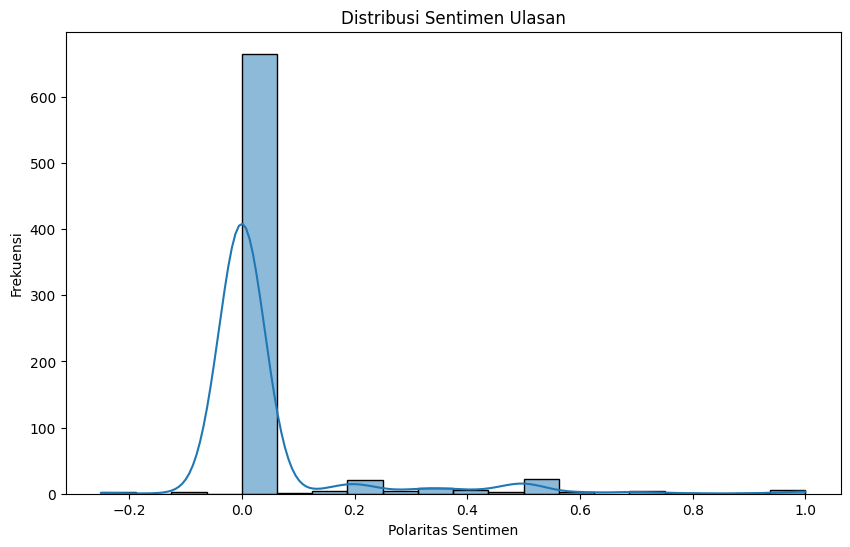

In [12]:
cursor = db_config.cursor(dictionary=True)

# Mengambil data dari tabel reviews
query = "SELECT feedbackID, reviewText FROM reviews"
cursor.execute(query)
data = cursor.fetchall()

# Menutup koneksi
cursor.close()
db_config.close()

# Analisis sentimen
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Menentukan polaritas dari sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom sentimen ke data
for row in data:
    row['sentiment'] = analyze_sentiment(row['reviewText'])

# Membuat DataFrame untuk visualisasi
df = pd.DataFrame(data)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Polaritas Sentimen')
plt.ylabel('Frekuensi')
plt.show()